
## Project: NEURAL NETWORKS FOR PREDICTING THERMODYNAMIC PROPERTIES

## Import Libraries

In [32]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display 
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers
import numpy as np
from sklearn.metrics import r2_score


# Pretty display for notebooks
%matplotlib inline

# Load the entire set, which was previosuly seprated into dataset and the test set
data= pd.read_excel('nndata.xlsx')
#drop random number used for validation
#Print features
print("The enthalpy dataset has {} data points with {} features each.".format(*data.shape))

The enthalpy dataset has 293 data points with 2215 features each.


## Data Exploration
In this section, you will begin exploring the data and explain variables.

In [33]:
# Display the first five rows of the dataset
print(display(data.head()))

#Drop methane beacuse of missing data
print(data.loc[117,'NAME'])

,No.,NAME,Enthalpy,MW,AMW,Sv,Se,Sp,Si,Mv,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,1,C6H8,39.65,80.14,5.724,8.107,13.534,9.046,15.661,0.579,...,0,0,0,0,0,0,0,0,0,0
1,2,C4H10,-32.58,58.14,4.153,6.634,13.418,7.807,16.076,0.474,...,0,0,0,0,0,0,0,0,0,0
2,3,C5H8,30.57,68.13,5.241,7.107,12.534,8.046,14.661,0.547,...,0,0,0,0,0,0,0,0,0,0
3,4,C8H16,-24.35,112.24,4.677,12.214,23.069,14.091,27.322,0.509,...,0,0,0,0,0,0,0,0,0,0
4,5,C15H32,-86.04,212.47,4.521,23.429,45.138,27.182,53.643,0.498,...,0,0,0,0,0,0,0,0,0,0


None
C6H10


### Drop Columns that Have ALL Zeros

In [34]:
cols = list(data)
nunique = data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data=data.drop(cols_to_drop, axis=1)

# data=data.loc[:, data.any()]
print("Now the enthalpy dataset has {} data points with {} features each.".format(*data.shape))

Now the enthalpy dataset has 293 data points with 1582 features each.


### Drop Columns that Have Any NA Values

In [35]:
dm=data
data= data.replace({'na':np.nan})
data= data.dropna(axis=1, how= 'any')
colls = dm.columns.difference(data.columns)
merged=dm[colls]
print("Now the enthalpy dataset has {} data points with {} features each.".format(*data.shape))
print("Now the enthalpy dataset has {} data points with {} features each.".format(*merged.shape))

Now the enthalpy dataset has 293 data points with 1489 features each.
Now the enthalpy dataset has 293 data points with 93 features each.


## Test for operations

In [36]:
from scipy import stats

df=data.drop(['No.','NAME'], axis=1)
print("The enthalpy dataset has {} data points with {} features each.".format(*df.shape))
#Addition
corr1=[]

for i in list(df):
    for j in list(df):
        if i != j:
            slope, intercept, r_value, p_value, std_err = stats.linregress(df[i].tolist(), df[j].tolist())
            if r_value > 0.90 or r_value <- 0.90:
                corr1.append(i)
ulist=[]
for i in np.unique(corr1):
    ulist.append(df.columns.get_loc(i))
leng=len(ulist)
lenge=round(leng/2)
ulist=sorted(ulist)
for i in range(0,lenge):
    ind=int(ulist[-1])
    df=df.drop(df.columns[ind],axis=1)
    ulist=ulist[:-1]

from pandas import ExcelWriter    
print("The enthalpy dataset has {} data points with {} features each.".format(*df.shape))
writer = pd.ExcelWriter('features.xlsx')
df.to_excel(writer,'features')
writer.save()

The enthalpy dataset has 293 data points with 1487 features each.
The enthalpy dataset has 293 data points with 778 features each.


### Drop repeated values in columns and export features

In [43]:
from pandas import ExcelWriter
df.to_csv('features.csv', sep=',', encoding='utf-8')
writer.save()

## Visualize Frequency For Enthalpy

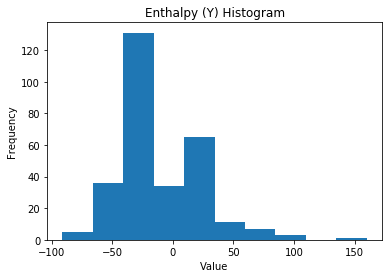

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
Enthalpy = data['Enthalpy'].values.tolist()
plt.hist(Enthalpy)
plt.title("Enthalpy (Y) Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()

plt.show()

### Data Description 

In [45]:
# print(df.describe())
# temp = df.describe()
# temp.to_csv('out.csv')

## Split Data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

target = df['Enthalpy']
features = df.drop('Enthalpy', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=19, test_size=0.097)
dfpre=X_train
dfprenon=X_train
Testing=X_test

# dest=X_train.max
# dust=X_test.max
# print(dest)
# print(dust)

# Success
print('Training and testing split was successful')

#Batch size for the fit
Bsize=263
nepochs=4000

Training and testing split was successful


## Normalization

In [47]:
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  
#Training Normalization
#Reomve enthalpy, since normalizing the output has no effect on the function
#Extract headers of the dataset
numerical=list(dfpre)
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
dfpre[numerical] = scaler.fit_transform(dfpre[numerical])
X_train=dfpre

#Testing Normalization
test = scaler.transform(Testing)
X_test=test
print(len(y_test))
print(len(y_train))

29
264


## SVR



In [30]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
# Fit regression model
# loo = cross_validation.LeaveOneOut(len(y_train))
Cs = [5800]
gammas = [0.002]
epsilons=[0.06]

param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon':epsilons}
y_poly=GridSearchCV(SVR(kernel='rbf'), param_grid, cv=264,n_jobs=1,verbose=1,scoring='neg_mean_absolute_error',return_train_score=True)
y_poly.fit(X_train, y_train)
y_pred_SVR= y_poly.predict(X_test)

print('Mean test score: {}'.format(y_poly.cv_results_['mean_test_score']))
print('Mean train score: {}'.format(y_poly.cv_results_['mean_train_score']))

xn=np.linspace(0,28,29)
#Results
plt.plot(xn, y_test,'ro')
plt.plot(xn, y_pred_SVR, 'go')
plt.ylabel('Enthalpy (kJ/mol)')
plt.xlabel('Test point number')
plt.legend(['Predicted Enthaply', 'Actual Enthalpy'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Support Vector Regression')

SVRR = r2_score(y_test.values, y_pred_SVR)

print(y_pred_SVR)
print(y_test.values)
print('The R2 score is: '+ str("{0:.2f}".format(SVRR)) + "%")

Fitting 264 folds for each of 1 candidates, totalling 264 fits


KeyboardInterrupt: 

## MODELS 1-268



## from sklearn.model_selection import KFold


In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=264)
i=1
his={}
d={}
X_train=X_train.values
y_train=y_train.values
for train, val in kfold.split(X_train,y_train):
    m=20
    L2=10**-5 #run for 3 time -5 if better -4 (score for validation)
    d["model{0}".format(i)] = Sequential()
    actfun='sigmoid'
    # Input layer
    d["model{0}".format(i)].add(Dense(m, activation=actfun, input_dim=777))
    # Layer 1
    d["model{0}".format(i)].add(Dense(m, activation=actfun, kernel_regularizer=regularizers.l2(L2)))
    # Layer 2
    d["model{0}".format(i)].add(Dense(m, activation=actfun, kernel_regularizer=regularizers.l2(L2)))
    # # Output layer
    d["model{0}".format(i)].add(Dense(1))
    d["model{0}".format(i)].summary()
    d["model{0}".format(i)].compile(loss='MAE',optimizer='adam')
    his["model{0}".format(i)] = d["model{0}".format(i)].fit(X_train[train], y_train[train], epochs=nepochs, batch_size=Bsize, verbose=0, validation_data=[X_train[val], y_train[val]])
    print(i)
    i=i+1
print(d)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 20)                15560     
_________________________________________________________________
dense_38 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_39 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 20)                15560     
_________________________________________________________________
dens

10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 20)                15560     
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_79 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
11
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 20)                15560     
_________________________________________________________________


20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_118 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_119 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
21
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 20)                15560     
_________________________________________________________________


30
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_158 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_159 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
31
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_161 (Dense)            (None, 20)                15560     
_________________________________________________________________


40
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_198 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_199 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
41
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 20)                15560     
_________________________________________________________________


50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_238 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_239 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_240 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
51
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 20)                15560     
_________________________________________________________________


60
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_277 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_278 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_279 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_280 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
61
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 20)                15560     
_________________________________________________________________


70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_317 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_318 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_319 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_320 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
71
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_321 (Dense)            (None, 20)                15560     
_________________________________________________________________


80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_357 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_358 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_359 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_360 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
81
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_361 (Dense)            (None, 20)                15560     
_________________________________________________________________


90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_398 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_399 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_400 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
91
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_401 (Dense)            (None, 20)                15560     
_________________________________________________________________


100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_437 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_438 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_439 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_440 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
101
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_441 (Dense)            (None, 20)                15560     
________________________________________________________________

110
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_477 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_478 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_479 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_480 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
111
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_481 (Dense)            (None, 20)                15560     
________________________________________________________________

120
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_517 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_518 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_519 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_520 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
121
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_521 (Dense)            (None, 20)                15560     
________________________________________________________________

130
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_557 (Dense)            (None, 20)                15560     
_________________________________________________________________
dense_558 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_559 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_560 (Dense)            (None, 1)                 21        
Total params: 16,421
Trainable params: 16,421
Non-trainable params: 0
_________________________________________________________________
131
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_561 (Dense)            (None, 20)                15560     
________________________________________________________________

## Evaluation Metrics and Visulization and Exporting Models 1-10
In a regression task, the model learns to predict numeric scores.

In [ ]:

#Test set number for this run
startmodel=1
endmodel=264


'''R2'''
#Evaulation Met
Rsum=0
for i in range(startmodel,endmodel+1):
    Rsum += r2_score(y_test.values,d['model'+str(i)].predict(X_test.values))

print('The average R2 score is: '+ str("{0:.2f}".format(Rsum/264*100)) + "%")





'''Training and Validation Losses'''

trainsum=0
valsum=0

for i in range(startmodel,endmodel+1):
    trainsum += his['model'+str(i)].history['loss'][-1]
    valsum += (his['model'+str(i)].history['val_loss'][-1]) 
print('The average training loss is: '+ str("{0:.2f}".format(trainsum/264)))
print('The average validation loss is: '+ str("{0:.2f}".format(valsum/264)))



'''Predictions Visualization'''
#Average predictions 
y_pred=0
for i in range(startmodel,endmodel+1):
    y_pred += d['model'+str(i)].predict(X_test.values)
plt.plot(y_pred/264, 'ro')
plt.plot(y_test.values, 'go')
plt.title('ANN Predictions')
plt.ylabel('Enthalpy (kJ/mol)')
plt.xlabel('Test point number')
plt.legend(['Predicted Enthaply', 'Actual Enthalpy'], loc='center left', bbox_to_anchor=(1, 0.5))

'''Saving'''

for i in range(startmodel,endmodel+1):
    name='model'+str(i)
    d[name].save(str(name)+'.h5')
print('Success')


In [ ]:
# from keras.models import load_model
# startmodel=1
# endmodel=268
# d={}
# for i in range(startmodel,endmodel+1):
#     d["model{0}".format(i)]=load_model(('model'+str(i)+'.h5'))

In [ ]:
# #Evaulation Met
# Rsum=0
# for i in range(startmodel,endmodel+1):
#     Rsum += r2_score(y_test.values,d['model'+str(i)].predict(X_test.values))

# print('The average R2 score is: '+ str("{0:.2f}".format(Rsum/268*100)) + "%")


# '''Predictions Visualization'''
# #Average predictions 
# y_pred=0
# for i in range(startmodel,endmodel+1):
#     y_pred += d['model'+str(i)].predict(X_test.values)
# plt.plot(y_pred/268, 'ro')
# plt.plot(y_test.values, 'go')
# plt.title('ANN Predictions')
# plt.ylabel('Enthalpy (kJ/mol)')
# plt.xlabel('Test point number')
# plt.legend(['Predicted Enthaply', 'Actual Enthalpy'], loc='center left', bbox_to_anchor=(1, 0.5))
